<a href="https://colab.research.google.com/github/AmirAzz/Test/blob/main/AmirAzizi_Oceanstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xarray matplotlib netcdf4 cmocean


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.0 MB/s eta 0:00:00


In [ ]:
OUTPUT_FILES = {
    "snapshot": "4deg.snapshot.nc",
    "averages": "4deg.averages.nc",
    "overturning": "4deg.overturning.nc",
    "energy": "4deg.energy.nc",}

In [ ]:

    snapshot= "/content/OUTPUT_FILES/4deg.snapshot.nc"
    averages= "/content/OUTPUT_FILES/4deg.averages.nc"
    overturning= "/content/OUTPUT_FILES/4deg.overturning.nc"
    energy="/content/OUTPUT_FILES/4deg.energy.nc"

In [ ]:
import xarray as xr

import numpy as np

import cmocean

In [ ]:
OUTPUT_FILES["energy"]

'4deg.energy.nc'

In [ ]:
C = './content/' + OUTPUT_FILES["averages"]


In [ ]:
print (C)

./content/4deg.averages.nc


In [ ]:
ds_avg = xr.open_dataset(./content/OUTPUT_FILES/4deg.averages.nc)


SyntaxError: ignored

In [ ]:
import xarray as xr

# Open a netCDF dataset file
ds = xr.open_dataset('/content/OUTPUT_FILES/4deg.averages.nc')

# Print the dataset information
print(ds)

ValueError: ignored

In [ ]:
import xarray as xr

!pip install netcdf4


# Open a netCDF dataset file with the netcdf4 engine
ds = xr.open_dataset('/4deg.averages.nc', engine='netcdf4')

# Print the dataset information
print(ds)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<xarray.Dataset>
Dimensions:       (Time: 10, isle: 6, nmonths: 12, yu: 40, xu: 90, zt: 15,
                   yt: 40, xt: 90, tensor1: 2, tensor2: 2, zw: 15)
Coordinates:
  * Time          (Time) timedelta64[ns] 32760 days 33120 days ... 36000 days
  * isle          (isle) float64 0.0 1.0 2.0 3.0 4.0 5.0
  * nmonths       (nmonths) float64 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * tensor1       (tensor1) float64 0.0 1.0
  * tensor2       (tensor2) float64 0.0 1.0
  * xt            (xt) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
  * xu            (xu) float64 4.0 8.0 12.0 16.0 ... 348.0 352.0 356.0 360.0
  * yt            (yt) float64 -78.0 -74.0 -70.0 -66.0 ... 66.0 70.0 74.0 78.0
  * yu            (yu) float64 -76.0 -72.0 -68.0 -64.0 ... 68.0 72.0 76.0 80.0
  * zt            (zt) float64 -4.855e+03 -4.165e+03 -3.575e+03 ... -65.0 -35.0
  * zw            (zw) float64 -4.51

/content/4deg.averages.nc

In [ ]:
print("averages")

averages


In [ ]:
ds["psi"] = ds.psi / 1e6

In [ ]:
ds["psi"].attrs["units"] = "Sv"

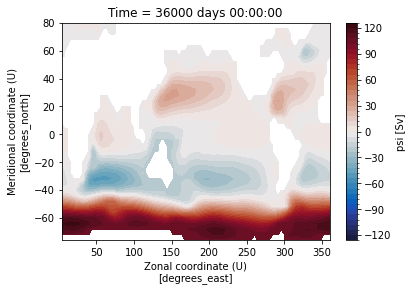

In [ ]:
ds["psi"].isel(Time=-1).plot.contourf(levels=50, cmap="cmo.balance")

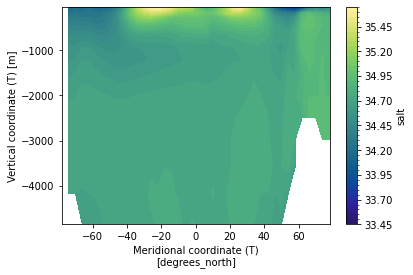

In [ ]:
(
    ds["salt"]
    .isel(Time=slice(-10,None))
    .mean(dim=("Time", "xt"))
    .plot.contourf(levels=50, cmap="cmo.haline")
)


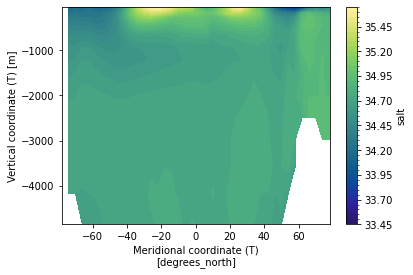

In [ ]:
(
    ds["salt"]
    .isel(Time=slice(-100,None))
    .mean(dim=("Time", "xt"))
    .plot.contourf(levels=50, cmap="cmo.haline")
)


In [ ]:
ds_snap = xr.open_dataset('/4deg.snapshot.nc', engine='netcdf4')


In [ ]:
weights = ds_snap["area_t"].fillna(0)

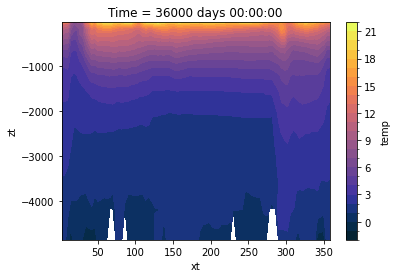

In [ ]:
temp_weighted = (
    ds["temp"]
    .isel(Time=-1)
    .weighted(weights)
    .mean(dim="yt")
    .plot.contourf(vmin=-2, vmax=22, levels=25, cmap="cmo.thermal")
)

In [ ]:
ds_ovr = xr.open_dataset('/content/OUTPUT_FILES/4deg.overturning.nc', engine='netcdf4')

In [ ]:
ds_ovr

<xarray.Dataset>
Dimensions:      (Time: 100, zw: 15, yu: 40, isle: 6, nmonths: 12, sigma: 60,
                  tensor1: 2, tensor2: 2, xt: 90, xu: 90, yt: 40, zt: 15)
Coordinates:
  * Time         (Time) timedelta64[ns] 360 days 720 days ... 36000 days
  * isle         (isle) float64 0.0 1.0 2.0 3.0 4.0 5.0
  * nmonths      (nmonths) float64 0.0 1.0 2.0 3.0 4.0 ... 7.0 8.0 9.0 10.0 11.0
  * sigma        (sigma) float64 5.804 5.934 6.064 6.195 ... 13.23 13.36 13.49
  * tensor1      (tensor1) float64 0.0 1.0
  * tensor2      (tensor2) float64 0.0 1.0
  * xt           (xt) float64 2.0 6.0 10.0 14.0 18.0 ... 346.0 350.0 354.0 358.0
  * xu           (xu) float64 4.0 8.0 12.0 16.0 20.0 ... 348.0 352.0 356.0 360.0
  * yt           (yt) float64 -78.0 -74.0 -70.0 -66.0 ... 66.0 70.0 74.0 78.0
  * yu           (yu) float64 -76.0 -72.0 -68.0 -64.0 ... 68.0 72.0 76.0 80.0
  * zt           (zt) float64 -4.855e+03 -4.165e+03 -3.575e+03 ... -65.0 -35.0
  * zw           (zw) float64 -4.51e+03 -3.87e+03 -3.28e+03 ... -120.0 -50.0 0.0
Data variables:
    bolus_depth  (Time, zw, yu) float64 ...
    bolus_iso    (Time, zw, yu) float64 ...
    trans        (Time, sigma, yu) float64 ...
    vsf_depth    (Time, zw, yu) float64 ...
    vsf_iso      (Time, zw, yu) float64 ...
    zarea        (Time, zt, yu) float64 ...
Attributes:
    date_created:      2021-10-26T12:02:33.542479
    veros_version:     1.4.2
    setup_identifier:  4deg

In [ ]:
ds_ovr["vsf_depth"] = ds_ovr.vsf_depth / 1e6

In [ ]:
ds_ovr.vsf_depth.attrs["long_name"] = "MOC"

In [ ]:
ds_ovr.vsf_depth.attrs["units"] = "Sv"

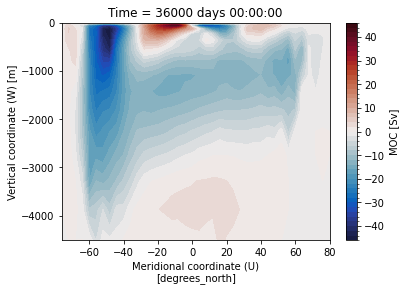

In [ ]:
ds_ovr.vsf_depth.isel(Time=-1).plot.contourf(levels=50, cmap="cmo.balance")

In [ ]:
ds_ovr["Time"].isel(Time=slice(10,))

<xarray.DataArray 'Time' (Time: 10)>
array([ 31104000000000000,  62208000000000000,  93312000000000000,
       124416000000000000, 155520000000000000, 186624000000000000,
       217728000000000000, 248832000000000000, 279936000000000000,
       311040000000000000], dtype='timedelta64[ns]')
Coordinates:
  * Time     (Time) timedelta64[ns] 360 days 720 days ... 3240 days 3600 days
Attributes:
    long_name:    Time
    time_origin:  01-JAN-1900 00:00:00

In [ ]:
years = ds_ovr["Time"] / np.timedelta64(360, "D")

In [ ]:
ds_ovr = ds_ovr.assign_coords(years=("Time", years.data))

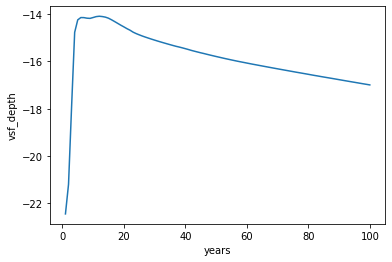

In [ ]:
(
    ds_ovr.vsf_depth
    .sel(zw=slice(-1810., -550.), yu=slice(40., 60.))
    .min(dim=("yu", "zw"))
    .plot(x="years")
)